In [1]:
import gym
from stable_baselines3 import PPO
import math
from matplotlib import pyplot as plt

import torch.nn.functional as F
import torch.nn as nn
import torch as th
import numpy as np
from torch.nn import init

from stable_baselines3.exp_agent import Exp_Agent
from stable_baselines3.exp_model import RND_Model
from stable_baselines3 import PPO

env_name = 'MountainCar-v0'
# env_name = 'MountainCarContinuous-v0'
# env_name = 'LunarLander-v2'
# env_name = 'Ant-v2'
print('tensorboard --logdir' + ' ./Tensorboard/'+env_name)

env = gym.make(env_name)

tensorboard --logdir ./Tensorboard/MountainCar-v0


## Setting mlpExtractor feature dimension
- Go to: stable_baselines3.common.policies.ActorCriticPolicy 
- Change: net_arch = [dict(pi=[dim, dim], vf=[dim, dim])]

In [14]:
model_path = './models/'+env_name+'_ppo_acb_pivf128'
model = Exp_Agent.load(model_path)
model.policy.mlp_extractor

MlpExtractor(
  (shared_net): Sequential()
  (policy_net): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
  )
  (value_net): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
  )
)

## Raward shape comparison: which embedding is better?

In [6]:
model_path = './models/'+env_name+'_ppo_acb_vf_fail'
model1 = Exp_Agent.load(model_path)

model_path = './models/'+env_name+'_ppo_acb_pi'
model2 = Exp_Agent.load(model_path)

model_path = './models/'+env_name+'_ppo_acb_pivf128'
model3 = Exp_Agent.load(model_path)

model_path = './models/'+env_name+'_ppo_acb_rnd_n64'
model4 = Exp_Agent.load(model_path)

exp_reward_info1 = model1.exp_model.exp_reward_info
print(len(exp_reward_info1))
exp_reward_info2 = model2.exp_model.exp_reward_info
print(len(exp_reward_info2))
exp_reward_info3 = model3.exp_model.exp_reward_info
print(len(exp_reward_info3))
exp_reward_info4 = model4.exp_model.exp_reward_info
print(len(exp_reward_info4))

253
227
283
226


/tmp/ipykernel_20542/2075866555.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


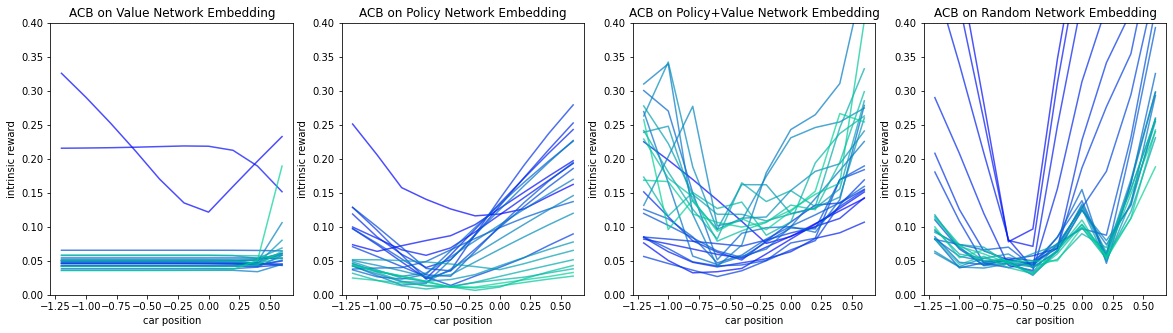

In [7]:
fig=plt.figure(figsize=(20,5))
fig.show()
x = np.linspace(-1.2, 0.6, 10)
n = 22
ylim = [0,0.4]
cmap = plt.get_cmap('winter')

ax=fig.add_subplot(141)
ax.set_ylim(ylim)
for i in range(n):
    ax.plot(x, exp_reward_info1[i*10], c=cmap(i*10), alpha=0.7)
    ax.set_xlabel('car position')
    ax.set_ylabel('intrinsic reward')
    ax.set_title('ACB on Value Network Embedding')


ax=fig.add_subplot(142)
ax.set_ylim(ylim)
for i in range(n):
    ax.plot(x, exp_reward_info2[i*10], c=cmap(i*10), alpha=0.7)
    ax.set_xlabel('car position')
    ax.set_ylabel('intrinsic reward')
    ax.set_title('ACB on Policy Network Embedding')

ax=fig.add_subplot(143)
ax.set_ylim(ylim)
for i in range(n):
    ax.plot(x, exp_reward_info3[i*10], c=cmap(i*10), alpha=0.7)
    ax.set_xlabel('car position')
    ax.set_ylabel('intrinsic reward')
    ax.set_title('ACB on Policy+Value Network Embedding')

ax=fig.add_subplot(144)
ax.set_ylim(ylim)
for i in range(n):
    ax.plot(x, exp_reward_info4[i*10], c=cmap(i*10), alpha=0.7)
    ax.set_xlabel('car position')
    ax.set_ylabel('intrinsic reward')
    ax.set_title('ACB on Random Network Embedding')

## Raward shape comparison: larger dimension is better?

In [8]:
model_path = './models/'+env_name+'_ppo_acb_rnd_n4'
model1 = Exp_Agent.load(model_path)

model_path = './models/'+env_name+'_ppo_acb_rnd_n16'
model2 = Exp_Agent.load(model_path)

model_path = './models/'+env_name+'_ppo_acb_rnd_n64'
model3 = Exp_Agent.load(model_path)

model_path = './models/'+env_name+'_ppo_acb_rnd_n128'
model4 = Exp_Agent.load(model_path)

model_path = './models/'+env_name+'_ppo_acb_rnd_n256'
model5 = Exp_Agent.load(model_path)

exp_reward_info1 = model1.exp_model.exp_reward_info
print(len(exp_reward_info1))
exp_reward_info2 = model2.exp_model.exp_reward_info
print(len(exp_reward_info2))
exp_reward_info3 = model3.exp_model.exp_reward_info
print(len(exp_reward_info3))
exp_reward_info4 = model4.exp_model.exp_reward_info
print(len(exp_reward_info4))
exp_reward_info5 = model5.exp_model.exp_reward_info
print(len(exp_reward_info4))

187
142
226
188
188


/tmp/ipykernel_20542/1249731415.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


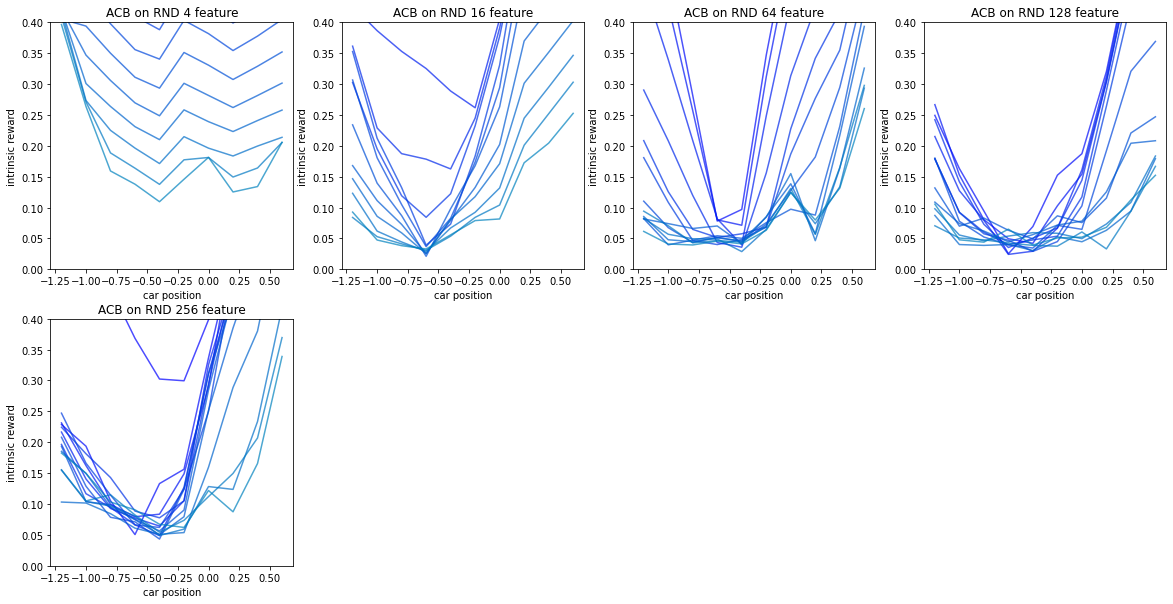

In [9]:
fig=plt.figure(figsize=(20,10))
fig.show()
x = np.linspace(-1.2, 0.6, 10)
n = 14
ylim = [0,0.4]
cmap = plt.get_cmap('winter')

ax=fig.add_subplot(241)
ax.set_ylim(ylim)
for i in range(n):
    ax.plot(x, exp_reward_info1[i*10], c=cmap(i*10), alpha=0.7)
    ax.set_xlabel('car position')
    ax.set_ylabel('intrinsic reward')
    ax.set_title('ACB on RND 4 feature')


ax=fig.add_subplot(242)
ax.set_ylim(ylim)
for i in range(n):
    ax.plot(x, exp_reward_info2[i*10], c=cmap(i*10), alpha=0.7)
    ax.set_xlabel('car position')
    ax.set_ylabel('intrinsic reward')
    ax.set_title('ACB on RND 16 feature')

ax=fig.add_subplot(243)
ax.set_ylim(ylim)
for i in range(n):
    ax.plot(x, exp_reward_info3[i*10], c=cmap(i*10), alpha=0.7)
    ax.set_xlabel('car position')
    ax.set_ylabel('intrinsic reward')
    ax.set_title('ACB on RND 64 feature')

ax=fig.add_subplot(244)
ax.set_ylim(ylim)
for i in range(n):
    ax.plot(x, exp_reward_info4[i*10], c=cmap(i*10), alpha=0.7)
    ax.set_xlabel('car position')
    ax.set_ylabel('intrinsic reward')
    ax.set_title('ACB on RND 128 feature')

ax=fig.add_subplot(245)
ax.set_ylim(ylim)
for i in range(n):
    ax.plot(x, exp_reward_info5[i*10], c=cmap(i*10), alpha=0.7)
    ax.set_xlabel('car position')
    ax.set_ylabel('intrinsic reward')
    ax.set_title('ACB on RND 256 feature')

## Raward shape comparison: reward shape throughout time

In [20]:
model_path = './models/'+env_name+'_ppo_acb_PIVF16_v1'
model = Exp_Agent.load(model_path)

232


/tmp/ipykernel_20275/1205042443.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


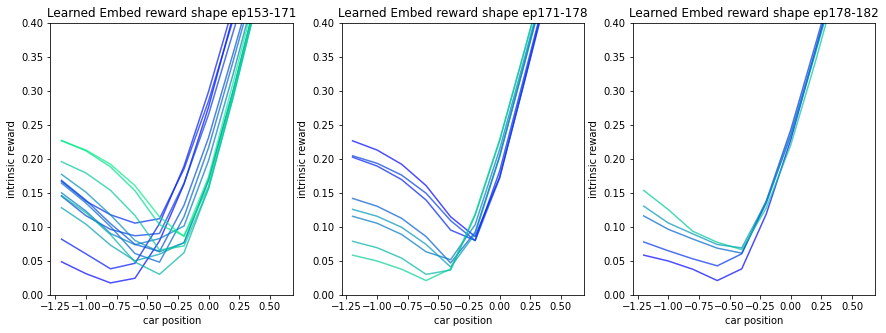

In [7]:
exp_reward_info1 = model.exp_model.exp_reward_info
print(len(exp_reward_info1))
fig=plt.figure(figsize=(20,5))
fig.show()
x = np.linspace(-1.2, 0.6, 10)
ep_range = np.linspace(153, 171, 13).astype(int)
ylim = [0,0.4]
cmap = plt.get_cmap('winter')

ax=fig.add_subplot(141)
ax.set_ylim(ylim)
for i, epoch in enumerate(ep_range):
    ax.plot(x, exp_reward_info1[epoch], c=cmap(i*20), alpha=0.7)
    ax.set_xlabel('car position')
    ax.set_ylabel('intrinsic reward')
    ax.set_title('Learned Embed reward shape ep153-171')


ep_range = np.linspace(171, 178, 8).astype(int)
ax=fig.add_subplot(142)
ax.set_ylim(ylim)
for i, epoch in enumerate(ep_range):
    ax.plot(x, exp_reward_info1[epoch], c=cmap(i*30), alpha=0.7)
    ax.set_xlabel('car position')
    ax.set_ylabel('intrinsic reward')
    ax.set_title('Learned Embed reward shape ep171-178')

ep_range = np.linspace(178, 182, 5).astype(int)
ax=fig.add_subplot(143)
ax.set_ylim(ylim)
for i, epoch in enumerate(ep_range):
    ax.plot(x, exp_reward_info1[epoch], c=cmap(i*50), alpha=0.7)
    ax.set_xlabel('car position')
    ax.set_ylabel('intrinsic reward')
    ax.set_title('Learned Embed reward shape ep178-182')